## Step 1: Load Challenge Winners Data

In this step, we load a dataset of Dev.to challenge winners that I manually collected from public information. The dataset includes challenge names, challenge tags, and the usernames of the winners, structured into a Pandas DataFrame for analysis.


In [32]:
import pandas as pd
import os
import src.api_client as api_client
import src.github_client as github_client
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


data = [
    ("Frontend Challenge v24.03.20", "frontendchallenge", "floscode"),
    ("Frontend Challenge v24.03.21", "frontendchallenge", "rafajrg21"),
    ("Frontend Challenge v24.03.22", "frontendchallenge", "highflyer910"),
    ("Cloudflare AI Challenge", "cloudflarechallenge", "kaarthik108"),
    ("Cloudflare AI Challenge", "cloudflarechallenge", "anselm94"),
    ("Cloudflare AI Challenge", "cloudflarechallenge", "julianandreszb"),
    ("Frontend Challenge v24.04.17", "frontendchallenge", "schmoris"),
    ("Frontend Challenge v24.04.17", "frontendchallenge", "devdongsu"),
    ("Frontend Challenge v24.04.17", "frontendchallenge", "jorgedelcampo"),
    ("Coze AI Bot Challenge", "cozechallenge", "phalkmin"),
    ("Coze AI Bot Challenge", "cozechallenge", "walter0"),
    ("Coze AI Bot Challenge", "cozechallenge", "arndom"),
    ("Coze AI Bot Challenge","cozechallenge", "programordie"),
    ("Netlify Dynamic Site Challenge", "netlifychallenge", "schemetastic"),
    ("Netlify Dynamic Site Challenge", "netlifychallenge", "srikant_code"),
    ("Netlify Dynamic Site Challenge", "netlifychallenge", "bytrangle"),
    ("The AWS Amplify Fullstack Typescript Challenge", "awschallenge", "sidjs"),
    ("The AWS Amplify Fullstack Typescript Challenge", "awschallenge", "travislramos"),
    ("The AWS Amplify Fullstack Typescript Challenge", "awschallenge", "maludecks"),
    ("Frontend Challenge v24.05.29", "frontendchallenge", "tanveermahendra"),
    ("Frontend Challenge v24.05.29", "frontendchallenge", "rith1x"),
    ("Computer Science Challenge Winners", "cschallenge", "derlin"),
    ("Computer Science Challenge Winners", "cschallenge", "shravan20"),
    ("Computer Science Challenge Winners", "cschallenge", "pachicodes"),
    ("Computer Science Challenge Winners", "cschallenge", "mishmanners"),
    ("Computer Science Challenge Winners", "cschallenge", "jonrandy"),
    ("Twilio Challenge", "twiliochallenge", "magodyboy"),
    ("Twilio Challenge", "twiliochallenge", "thegeekyamit"),
    ("Twilio Challenge", "twiliochallenge", "anshsaini"),
    ("Twilio Challenge", "twiliochallenge", "ashiqsultan"),
    ("Wix Studio Challenge", "wixstudiochallenge", "phoedesign"),
    ("Build Better on Stellar: Smart Contract Challenge", "stellarchallenge", "gr1ll"),
    ("Build Better on Stellar: Smart Contract Challenge", "stellarchallenge", "_0xmorpheus"),
    ("Build Better on Stellar: Smart Contract Challenge", "stellarchallenge", "koolamusic"),
    ("Frontend Challenge v24.07.24", "frontendchallenge", "rith1x"),
    ("Frontend Challenge v24.07.24", "frontendchallenge", "eoinmcg"),
    ("Nylas AI and Communications Challenge", "nylaschallenge", "violetadev"),
    ("Nylas AI and Communications Challenge", "nylaschallenge", "ansellmaximilian"),
    ("Neon OSS Starter Kit Challenge", "neonchallenge", "josectoscano"),
    ("Neon OSS Starter Kit Challenge", "neonchallenge", "rohittcodes"),
    ("Neon OSS Starter Kit Challenge", "neonchallenge", "timotej_avsec"),
    ("Frontend Challenge v24.09.04", "frontendchallenge", "hosana"),
    ("Frontend Challenge v24.09.04", "frontendchallenge", "jagroop2001"),
    ("Web Game Challenge", "gamechallenge", "hikolakita"),
    ("Web Game Challenge", "gamechallenge", "jyoung4242"),
    ("Hacktoberfest Writing Challenge", "hacktoberfestchallenge", "suryanshsingh2001"),
    ("Hacktoberfest Writing Challenge", "hacktoberfestchallenge", "jacksonkasi"),
    ("Hacktoberfest Writing Challenge", "hacktoberfestchallenge", "nabhel"),
    ("Hacktoberfest Writing Challenge", "hacktoberfestchallenge", "akashjana"),
    ("Pinata Challenge", "pinatachallenge", "nightlyinks"),
    ("Pinata Challenge", "pinatachallenge", "fredoist"),
    ("Pinata Challenge", "pinatachallenge", "milewski"),
    ("Wix Studio Challenge: Community Edition", "wixstudiochallenge", "schemetastic"),
    ("The Open Source AI Challenge with pgai and Ollama", "pgaichallenge", "ritesh_hiremath_eb6abb681"),
    ("The Open Source AI Challenge with pgai and Ollama", "pgaichallenge", "milewski"),
    ("The Open Source AI Challenge with pgai and Ollama", "pgaichallenge", "fahminlb33"),
    ("The Open Source AI Challenge with pgai and Ollama", "pgaichallenge", "ykimura"),
    ("AssemblyAI Challenge", "assemblyaichallenge", "djovannih"),
    ("AssemblyAI Challenge", "assemblyaichallenge", "binarygarage"),
    ("AssemblyAI Challenge", "assemblyaichallenge", "diosamuel"),
    ("DevCycle Feature Flag Challenge", "devcyclechallenge", "ansellmaximilian"),
    ("DevCycle Feature Flag Challenge", "devcyclechallenge", "iabdsam"),
    ("DevCycle Feature Flag Challenge", "devcyclechallenge", "jacksonkasi"),
    ("Frontend Challenge: December Edition", "frontendchallenge", "aslanreza"),
    ("Frontend Challenge: December Edition", "frontendchallenge", "wantu"),
    ("Bright Data Web Scraping Challenge", "brightdatachallenge", "sarahokolo"),
    ("Bright Data Web Scraping Challenge", "brightdatachallenge", "yukaty"),
    ("Bright Data Web Scraping Challenge", "brightdatachallenge", "dhanushreddy29"),
    ("GitHub Copilot 1-Day Build Challenge", "githubchallenge", "bridget_amana"),
    ("GitHub Copilot 1-Day Build Challenge", "githubchallenge", "jennyzzt"),
    ("GitHub Copilot 1-Day Build Challenge", "githubchallenge", "josectoscano"),
    ("Agent.ai Challenge", "agentaichallenge", "ritesh_hiremath_eb6abb681"),
    ("Agent.ai Challenge", "agentaichallenge", "gocool_777"),
    ("Agent.ai Challenge", "agentaichallenge", "sosuisen"),
    ("Agent.ai Challenge", "agentaichallenge", "divya4879"),
    ("New Year Writing challenge", "newyearchallenge", "ashleyd480"),
    ("New Year Writing challenge", "newyearchallenge", "aniruddhaadak"),
    ("New Year Writing challenge", "newyearchallenge", "dcastrocordero22"),
    ("New Year Writing challenge", "newyearchallenge", "async_dime"),
    ("New Year Writing challenge", "newyearchallenge", "itscocopo"),
    ("New Year Writing challenge", "newyearchallenge", "nataliedeweerd"),
]

df = pd.DataFrame(data, columns=["challendge_name", "challendge_tag", "username"])

df


,challendge_name,challendge_tag,username
0,Frontend Challenge v24.03.20,frontendchallenge,floscode
1,Frontend Challenge v24.03.21,frontendchallenge,rafajrg21
2,Frontend Challenge v24.03.22,frontendchallenge,highflyer910
3,Cloudflare AI Challenge,cloudflarechallenge,kaarthik108
4,Cloudflare AI Challenge,cloudflarechallenge,anselm94
...,...,...,...
76,New Year Writing challenge,newyearchallenge,aniruddhaadak
77,New Year Writing challenge,newyearchallenge,dcastrocordero22
78,New Year Writing challenge,newyearchallenge,async_dime
79,New Year Writing challenge,newyearchallenge,itscocopo


## Step 2: Load Challenge Winners Data

In this step, we check if a previously saved dataset of Dev.to challenge winners exists. If the file `devto_challenge_winners.parquet` is found, we load the data from it. Otherwise, we fetch the latest challenge winners using the Forem API https://developers.forem.com/ and save the dataset for future use.


In [33]:
if os.path.exists("devto_challenge_winners.parquet"):
    # Load winners data from the existing Parquet file
    winners_data = pd.read_parquet("devto_challenge_winners.parquet")
    print("Loaded challenge winners from devto_challenge_winners.parquet")
else:
    # Fetch winners data and save to Parquet file
    winners_data = api_client.load_users_with_details(df)
    winners_data.to_parquet("devto_challenge_winners.parquet", compression='gzip')
    print("Fetched challenge winners from API and saved to devto_challenge_winners.parquet")

winners_data.head(10)


Loaded challenge winners from devto_challenge_winners.parquet


,challendge_name,challendge_tag,username,name,twitter_username,github_username,summary,location,website_url,joined_at,profile_image
0,Frontend Challenge v24.03.20,frontendchallenge,floscode,Florian,None,flos-code,Junior Frontend Developer • JavaScript & Angular user • UI/UX design enthusiast,Germany,https://scholz-florian.com/,"Mar 17, 2024","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F1358491%2Fa052ea75-af3a-453d-96e7-d80ef6804f6f.jpeg"
1,Frontend Challenge v24.03.21,frontendchallenge,rafajrg21,Rafael Romero,None,Rafajrg21,"Computer Engineer from Venezuela 💻\n\n""Try to learn something about everything and everything about something""","Maracaibo, Venezuela",,"Mar 3, 2018","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F60601%2F8d4e424e-2f6f-499b-a330-2f4d3bee7e0d.jpg"
2,Frontend Challenge v24.03.22,frontendchallenge,highflyer910,Thea,highflyer910,highflyer910,"Frontend Engineer with a passion for Python, Vue, and graphic design, In-game Photographer, Introvert, Lifelong learner, Curious cat (='.'=)","Batumi, Georgia",https://www.teona.dev/,"Jan 29, 2017","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F2491%2F2e334b3d-5af0-43e5-95c0-e3ededf148f7.png"
3,Cloudflare AI Challenge,cloudflarechallenge,kaarthik108,Kaarthik Andavar,kaarthikcodes,kaarthik108,AI Engineering,NewZealand,https://www.k01.dev/,"Jun 16, 2023","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F1102647%2Ff8de1cf2-cef9-4e3a-9bca-c0510119bcf0.png"
4,Cloudflare AI Challenge,cloudflarechallenge,anselm94,Merbin J Anselm,MerbinJAnselm,anselm94,Connect with me on LinkedIn: https://linkedin.com/in/merbinjanselm/,Tirunelveli,https://github.com/anselm94,"Apr 18, 2019","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F158056%2F315520c5-b079-41a1-8a43-8b5700a41890.png"
5,Cloudflare AI Challenge,cloudflarechallenge,julianandreszb,julianandreszb,None,julianandreszb,None,None,None,"Feb 13, 2021","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F578772%2F888b034c-2763-403c-8d9a-ffae092393b9.jpeg"
6,Frontend Challenge v24.04.17,frontendchallenge,schmoris,Boris,None,boris-schwarz,,None,None,"Nov 14, 2023","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F1209509%2Fa864476f-a735-4102-a121-222e6823bfbb.png"
7,Frontend Challenge v24.04.17,frontendchallenge,devdongsu,dongsu,None,dev-dong-su,,,,"Jun 14, 2023","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F1100995%2F7e0e4649-bcbe-4595-ae3d-f456574e7e9a.png"
8,Frontend Challenge v24.04.17,frontendchallenge,jorgedelcampo,Jorge del Campo,None,jorgedelcampo,Growth Marketing and Web Development Consultant over 15 years of experience.,"Santiago, Chile",https://www.instagram.com/blomg.cl/,"Apr 20, 2024","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F1438168%2Ff4c276d9-792b-4f99-88cc-dc594b8d498a.jpeg"
9,Coze AI Bot Challenge,cozechallenge,phalkmin,Paulo Henrique,None,phalkmin,"WordPress Optimization Specialist | 15+ Years of Experti

## Step 3: Enrich Challenge Winners Data with Articles  

Now, we enhance the challenge winners dataset by fetching their published articles. This step helps us analyze their writing activity and engagement on Dev.to.


In [34]:
if os.path.exists("devto_enriched_winners.parquet"):
    # Load enriched winners data from the existing Parquet file
    enriched_winners_data = pd.read_parquet("devto_enriched_winners.parquet")
    print("Loaded enriched challenge winners from devto_enriched_winners.parquet")
else:
    # Enrich winners data with article information
    enriched_winners_data = api_client.update_followers_with_articles(winners_data)
    enriched_winners_data.to_parquet("devto_enriched_winners.parquet", compression='gzip')
    print("Fetched enriched challenge winners from API and saved to devto_enriched_winners.parquet")

enriched_winners_data.head(10)


Loaded enriched challenge winners from devto_enriched_winners.parquet


,challendge_name,challendge_tag,username,name,twitter_username,github_username,summary,location,website_url,joined_at,profile_image,article_count,article_titles,unique_tags,tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts,article_published_at
0,Frontend Challenge v24.03.20,frontendchallenge,floscode,Florian,None,flos-code,Junior Frontend Developer • JavaScript & Angular user • UI/UX design enthusiast,Germany,https://scholz-florian.com/,"Mar 17, 2024","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F1358491%2Fa052ea75-af3a-453d-96e7-d80ef6804f6f.jpeg",3,"[Cloudflare AI Challenge Submission: Image to Lyrics Generator 🎨🎵, Glam Up My Markup: Camp bunny hop 🐰, The Frontend Challenge: 🍌 bananas are the superior fruit]","[devchallenge, javascript, frontendchallenge, css, webdev, ai, cloudflarechallenge]","[[cloudflarechallenge, devchallenge, ai, webdev], [frontendchallenge, devchallenge, css, javascript], [frontendchallenge, devchallenge, css]]","[4, 1, 2]","[8, 3, 32]","[18, 22, 136]","[2024-04-10T15:28:31Z, 2024-03-25T20:00:00Z, 2024-03-25T17:00:00Z]"
1,Frontend Challenge v24.03.21,frontendchallenge,rafajrg21,Rafael Romero,None,Rafajrg21,"Computer Engineer from Venezuela 💻\n\n""Try to learn something about everything and everything about something""","Maracaibo, Venezuela",,"Mar 3, 2018","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F60601%2F8d4e424e-2f6f-499b-a330-2f4d3bee7e0d.jpg",6,"[The Frontend Challenge 4 - Glam Up My Markup: Recreation, One Byte Explainer - The Nibble, The Frontend Challenge v2: Earth Day Edition🌎, The Frontend Challenge: Glammed Up Camp Activities, My Hacktoberfest 2023 Pledge, Which terminal do you use?]","[devchallenge, javascript, frontendchallenge, hacktoberfest23, css, beginners, computerscience, discuss, cschallenge]","[[devchallenge, frontendchallenge, css, javascript], [devchallenge, cschallenge, computerscience, beginners], [devchallenge, frontendchallenge, css, javascript], [frontendchallenge, devchallenge, css, javascript], [hacktoberfest23], [discuss]]","[2, 1, 4, 4, 2, 1]","[3, 0, 0, 15, 0, 3]","[4, 13, 2, 38, 1, 2]","[2024-08-05T03:21:59Z, 2024-06-14T15:55:31Z, 2024-04-29T03:33:19Z, 2024-03-31T22:11:13Z, 2023-10-11T14:56:22Z, 2019-06-08T01:53:08Z]"
2,Frontend Challenge v24.03.22,frontendchallenge,highflyer910,Thea,highflyer910,highflyer910,"Frontend Engineer with a passion for Python, Vue, and graphic design, In-game Photographer, Introvert, Lifelong learner, Curious cat (='.'=)","Batumi, Georgia",https://www.teona.dev/,"Jan 29, 2017","https://media2.dev.to/dynamic/image/width=320,height=320,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Fuser%2Fprofile_image%2F2491%2F2e334b3d-5af0-43e5-95c0-e3ededf148f7.png",19,"[Submission For Front-end Challenge - Earth Day Edition 🌍Pale Blue Dot, Intersection Observer API - One Byte Explainer, My New Favorite CSS Trick: will-change, React Props vs State: What's the Difference?, JavaScript Design Patterns: Organize, Reuse, and Boost Your Code, Folder Icons for Devs: Making My Desktop Less Messy, How I Fixed 404 Errors in My Vue Project Deployed on Netlify, Vue.js Gallery Page: Creating a Custom Loader for Better User Experience, Common Web Security Attacks and Top Tips to Protect Your Website, Speed Up Your Site: Proven Ways to Improve Web Page Load Time, Unlocking Web Accessibility: Tips for Developers, Create Custom Scrollbar Using CSS, A Short Guide to Python Comprehensions, Python data structures (lists, tuples, dictionaries, sets), What is a Python docstring?, My Favorite Chrome Extensions for web development and design, What Is Tor and Should We Use It?, The beginner's guide to contributing to projects with GitHub Des

## Step 4: Scrape Additional Profile Statistics  

To gain deeper insights into the challenge winners, we enrich the dataset with additional profile statistics. This includes engagement metrics such as badges earned, comments made, and tags followed.


In [35]:
if os.path.exists("devto_scraped_winners.parquet"):
    # Load enriched winners data with scraped stats from the existing Parquet file
    scraped_winners_data = pd.read_parquet("devto_scraped_winners.parquet")
    print("Loaded scraped challenge winners from devto_scraped_winners.parquet")
else:
    # Enrich winners data with additional profile statistics
    scraped_winners_data = api_client.update_followers_with_stats(enriched_winners_data)
    scraped_winners_data.to_parquet("devto_scraped_winners.parquet", compression='gzip')
    print("Fetched scraped challenge winners from API and saved to devto_scraped_winners.parquet")

scraped_winners_data.head(10)


Loaded scraped challenge winners from devto_scraped_winners.parquet


,challendge_name,challendge_tag,username,name,twitter_username,github_username,summary,location,website_url,joined_at,...,unique_tags,tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts,article_published_at,badges,badge_descriptions,comments_count,tags_count
0,Frontend Challenge v24.03.20,frontendchallenge,floscode,Florian,None,flos-code,Junior Frontend Developer • JavaScript & Angular user • UI/UX design enthusiast,Germany,https://scholz-florian.com/,"Mar 17, 2024",...,"[devchallenge, javascript, frontendchallenge, css, webdev, ai, cloudflarechallenge]","[[cloudflarechallenge, devchallenge, ai, webdev], [frontendchallenge, devchallenge, css, javascript], [frontendchallenge, devchallenge, css]]","[4, 1, 2]","[8, 3, 32]","[18, 22, 136]","[2024-04-10T15:28:31Z, 2024-03-25T20:00:00Z, 2024-03-25T17:00:00Z]","[Cloudflare AI Challenge Completion Badge, 4 Week Community Wellness Streak, Frontend Challenge Winner Badge, Frontend Challenge Completion Badge, 2 Week Community Wellness Streak, Writing Debut, 1 Week Community Wellness Streak]","[Awarded for completing at least one prompt in the Cloudflare AI Challenge in 2024. Thank you for participating! 🧡, Keep contributing to discussions by posting at least 2 comments per week for 4 straight weeks. Unlock the 8 Week Badge next., Awarded for submitting a winning project to a Frontend Challenge prompt. Congratulations! ✨, Awarded for completing at least one prompt in a Frontend Challenge. Thank you for participating! 💖, Keep the community conversation going! Post at least 2 comments for 2 straight weeks and unlock the 4 Week Badge., Awarded for writing and sharing your first DEV post! Continue sharing your work to earn the 4 Week Writing Streak Badge., For actively engaging with the community by posting at least 2 comments in a single week.]",25,11
1,Frontend Challenge v24.03.21,frontendchallenge,rafajrg21,Rafael Romero,None,Rafajrg21,"Computer Engineer from Venezuela 💻\n\n""Try to learn something about everything and everything about something""","Maracaibo, Venezuela",,"Mar 3, 2018",...,"[devchallenge, javascript, frontendchallenge, hacktoberfest23, css, beginners, computerscience, discuss, cschallenge]","[[devchallenge, frontendchallenge, css, javascript], [devchallenge, cschallenge, computerscience, beginners], [devchallenge, frontendchallenge, css, javascript], [frontendchallenge, devchallenge, css, javascript], [hacktoberfest23], [discuss]]","[2, 1, 4, 4, 2, 1]","[3, 0, 0, 15, 0, 3]","[4, 13, 2, 38, 1, 2]","[2024-08-05T03:21:59Z, 2024-06-14T15:55:31Z, 2024-04-29T03:33:19Z, 2024-03-31T22:11:13Z, 2023-10-11T14:56:22Z, 2019-06-08T01:53:08Z]","[Frontend Challenge Completion Badge, CS Challenge Completion Badge, 2 Week Community Wellness Streak, 1 Week Community Wellness Streak, Frontend Challenge Winner Badge, Six Year Club, Writing Debut, Hacktoberfest 2023 Pledge, Five Year Club, Hacktoberfest 2022, Four Year Club, Three Year Club, Two Year Club, Hacktoberfest 2019, One Year Club]","[Awarded for completing at least one prompt in a Frontend Challenge. Thank you for participating! 💖, Awarded for completing a prompt in a Computer Science Challenge. Thank you for participating! 💻, Keep the community conversation going! Post at least 2 comments for 2 straight weeks and unlock the 4 Week Badge., For actively engaging with the community by posting at least 2 comments in a single week., Awarded for submitting a winning project to a Frontend Challenge prompt. Congratulations! ✨, This badge celebrates the longevity of those who have been a registered member of the DEV Community for at least six years., Awarded for writing and sharing your first DEV post! Continue sharing your work to earn the 4 Week Writing Streak Badge., Earned by pledging commitment and authoring a post about Hackathon experience or Hacktoberfest goals. This achievement sets participants on the path to earning other badges., This badge celebrates the longevity of those who have been a r

## Analysis

Now that we have all the data, let's dive into the analysis.

Here, we analyze how many times each user has won a Dev.to challenge. We identify participants who have won multiple challenges, providing insights into the most consistent winners.


In [36]:
pd.set_option("display.max_colwidth", None)  # Show full content of each cell
winner_frequencies = scraped_winners_data["username"].value_counts()

repeat_winners = winner_frequencies[winner_frequencies > 1].index

winners_challenges = (
    scraped_winners_data[scraped_winners_data["username"].isin(repeat_winners)]
    .groupby("username")["challendge_name"]
    .apply(list)
    .reset_index()
)

winners_challenges.to_csv("cha")


## Identifying Repeat Challenge Winners  

We analyze how many times each user has won a Dev.to challenge. This helps identify participants who have consistently performed well across multiple challenges.  

## Filtering Articles and Categorizing Winners  

To focus on meaningful contributions, we filter out articles with a reading time of 1 minute or less. After filtering, winners are categorized based on their engagement level:  

- **Active Contributors**: Users who have published substantial articles or left comments.  
- **Connected Profiles**: Users with external links such as GitHub, Twitter, or a personal website but no direct engagement.  
- **Basic Profiles**: Users who have a location or summary filled but no other activity.  
- **Empty Profiles**: Users with no significant profile information or engagement.  

The distribution of winners across these categories is visualized using both a horizontal bar chart and a donut chart.


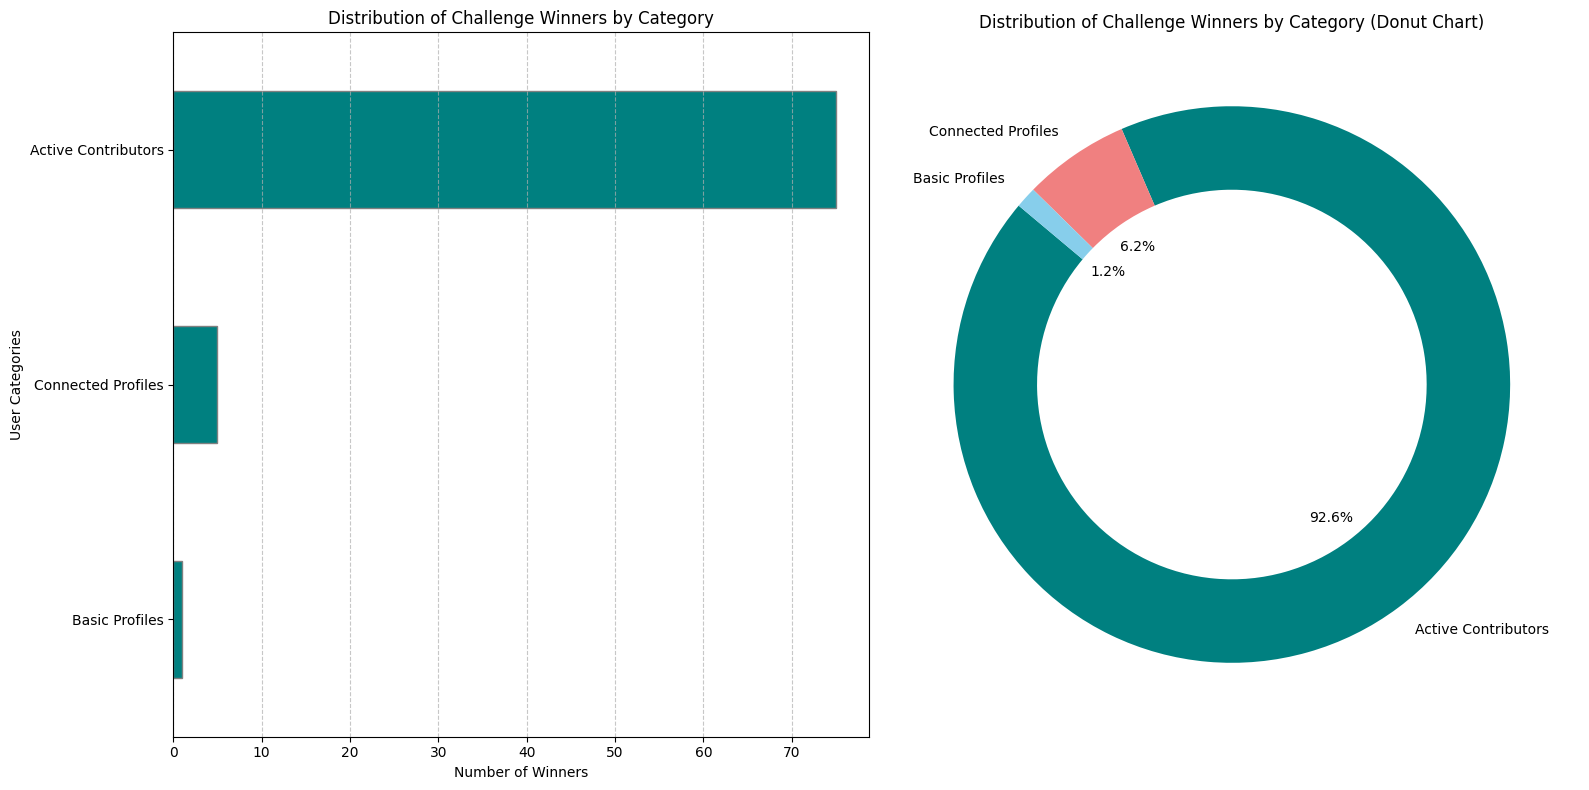

In [37]:
filtered_winners_data = scraped_winners_data.copy()

# Function to filter out articles with reading time ≤ 1 minute
def filter_articles(row):
    titles = row["article_titles"]
    reading_times = row["article_reading_time_minutes"]
    comments = row["article_comments_counts"]
    reactions = row["article_positive_reactions_counts"]
    
    # Keep only articles with a reading time greater than 1 minute
    filtered_data = [
        (title, time, comment, reaction) 
        for title, time, comment, reaction in zip(titles, reading_times, comments, reactions) 
        if time > 1
    ]
    
    if filtered_data:
        titles, reading_times, comments, reactions = zip(*filtered_data)
    else:
        titles, reading_times, comments, reactions = [], [], [], []
    
    return pd.Series({
        "article_titles": list(titles),
        "article_reading_time_minutes": list(reading_times),
        "article_comments_counts": list(comments),
        "article_positive_reactions_counts": list(reactions)
    })

# Apply the filtering function
filtered_columns = filtered_winners_data.apply(filter_articles, axis=1)
filtered_winners_data[["article_titles", "article_reading_time_minutes", 
                       "article_comments_counts", "article_positive_reactions_counts"]] = filtered_columns

# Update article count after filtering
filtered_winners_data["article_count"] = filtered_winners_data["article_titles"].apply(len)

# Define user categories
filtered_winners_data["category"] = "Empty Profiles"  # Default category

# Active Contributors: Users with articles (reading time > 1) more than 1 or comments
filtered_winners_data.loc[
    (filtered_winners_data["article_count"] > 1) | (filtered_winners_data["comments_count"] > 0), 
    "category"
] = "Active Contributors"

# Connected Profiles: Users with external links but no direct engagement
filtered_winners_data.loc[
    (filtered_winners_data[["website_url", "github_username", "twitter_username"]].notna().any(axis=1)) &
    (filtered_winners_data["category"] == "Empty Profiles"), 
    "category"
] = "Connected Profiles"

# Basic Profiles: Users with minimal information (location or summary)
filtered_winners_data.loc[
    (filtered_winners_data[["location", "summary"]].notna().any(axis=1)) &
    (filtered_winners_data["category"] == "Empty Profiles"), 
    "category"
] = "Basic Profiles"

# Count users in each category
category_counts = filtered_winners_data["category"].value_counts()

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Horizontal bar chart
category_counts.plot(kind="barh", color="teal", edgecolor="gray", ax=ax1)
ax1.set_xlabel("Number of Winners")
ax1.set_ylabel("User Categories")
ax1.set_title("Distribution of Challenge Winners by Category")
ax1.invert_yaxis()
ax1.grid(axis="x", linestyle="--", alpha=0.7)

# Donut chart
ax2.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=140, 
        wedgeprops={"width": 0.3}, colors=["teal", "lightcoral", "skyblue", "orange"])
ax2.set_title("Distribution of Challenge Winners by Category (Donut Chart)")

plt.tight_layout()
plt.show()


## Where Are Dev.to Challenge Winners From?  

To understand the geographic distribution of challenge winners, we analyzed the **top 10 most common locations** listed in their profiles.  


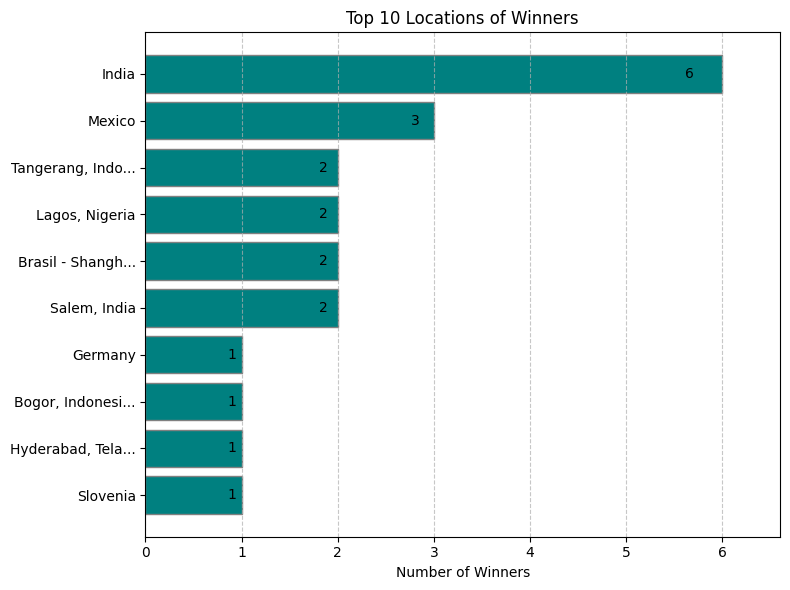

In [38]:
# Filter out empty or NaN values in the 'location' column and calculate the top 10 locations
top_locations = filtered_winners_data['location'].dropna().replace('', pd.NA).dropna().value_counts().nlargest(10)

# Truncate location names to a maximum of 15 characters
def truncate_label(label, max_length=15):
    return label if len(label) <= max_length else label[:max_length] + "..."

labels = [truncate_label(loc) for loc in top_locations.index]
values = top_locations.values

plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color="teal", edgecolor='gray')

plt.xlim(0, max(values) * 1.1)

for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05), 
             bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center', ha='right', fontsize=10, color='black')

plt.xlabel("Number of Winners")
plt.title("Top 10 Locations of Winners")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Challenge Participation vs. Wins  

This chart highlights the **top 20 most active Dev.to challenge participants**, comparing their **total challenge submissions** (light blue) with their **actual wins** (teal).  

Some winners have participated in multiple challenges, while others have a higher success rate with fewer submissions. This helps visualize the relationship between participation frequency and winning.


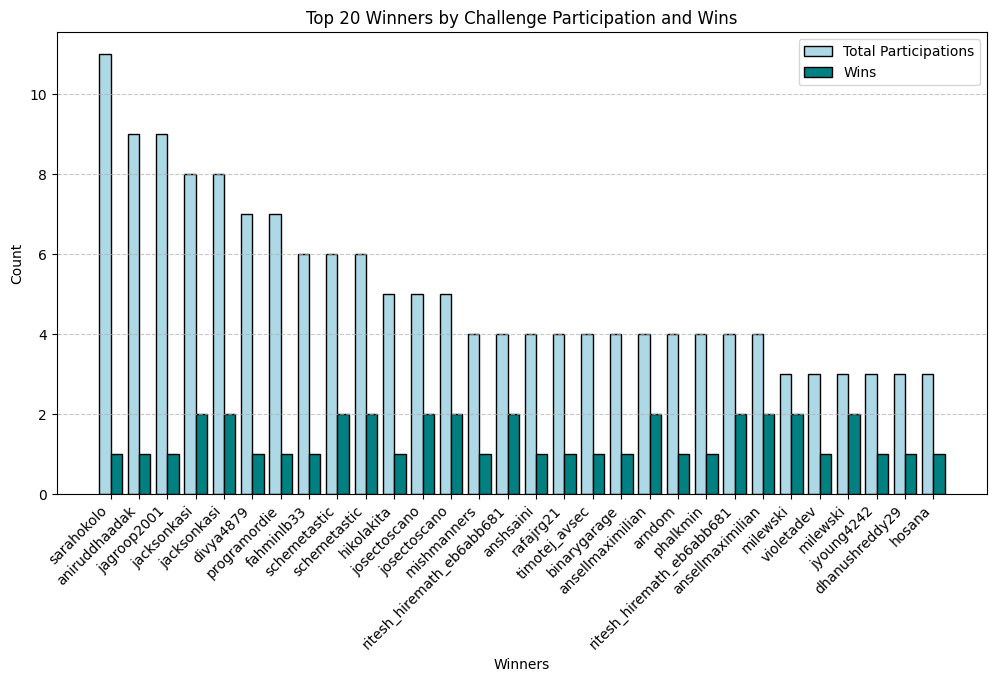

In [39]:
# Count how many times each winner participated in challenges (based on #devchallenge and specific challenge tags)
extended_scrapped_winners_copy_df = filtered_winners_data.copy()
def count_participations(row):
    return sum(1 for tag_list in row['tags'] if 'devchallenge' in tag_list)

extended_scrapped_winners_copy_df['challenge_participations'] = extended_scrapped_winners_copy_df.apply(count_participations, axis=1)

# Count how many times each winner actually won a challenge
winner_counts = extended_scrapped_winners_copy_df['username'].value_counts()
extended_scrapped_winners_copy_df['challenge_wins'] = extended_scrapped_winners_copy_df['username'].map(winner_counts)

df_sorted = extended_scrapped_winners_copy_df.sort_values(by='challenge_participations', ascending=False).head(30)

bar_width = 0.4
indices = np.arange(len(df_sorted))

plt.figure(figsize=(12, 6))
plt.bar(indices, df_sorted['challenge_participations'], width=bar_width, label='Total Participations', 
        color='lightblue', edgecolor='black')
plt.bar(indices + bar_width, df_sorted['challenge_wins'], width=bar_width, label='Wins', 
        color='teal', edgecolor='black')

plt.xlabel("Winners")
plt.ylabel("Count")
plt.title("Top 20 Winners by Challenge Participation and Wins")
plt.xticks(indices + bar_width / 2, df_sorted['username'], rotation=45, ha="right")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


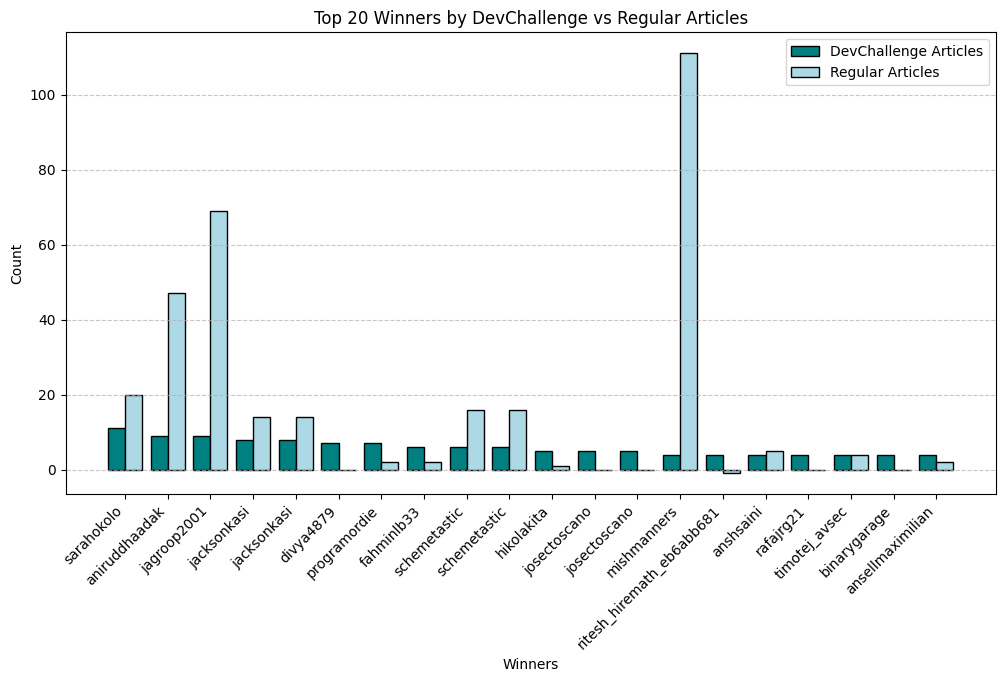

In [40]:
import matplotlib.pyplot as plt
import numpy as np

df_copy = extended_scrapped_winners_copy_df.copy()

df_copy['devchallenge_articles'] = df_copy['tags'].apply(lambda tag_lists: sum(1 for tags in tag_lists if 'devchallenge' in tags))
df_copy['regular_articles'] = df_copy['article_count'] - df_copy['devchallenge_articles']

df_sorted = df_copy.sort_values(by='devchallenge_articles', ascending=False).head(20)

bar_width = 0.4
indices = np.arange(len(df_sorted))

plt.figure(figsize=(12, 6))
plt.bar(indices, df_sorted['devchallenge_articles'], width=bar_width, label='DevChallenge Articles', 
        color='teal', edgecolor='black')
plt.bar(indices + bar_width, df_sorted['regular_articles'], width=bar_width, label='Regular Articles', 
        color='lightblue', edgecolor='black')

plt.xlabel("Winners")
plt.ylabel("Count")
plt.title("Top 20 Winners by DevChallenge vs Regular Articles")
plt.xticks(indices + bar_width / 2, df_sorted['username'], rotation=45, ha="right")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


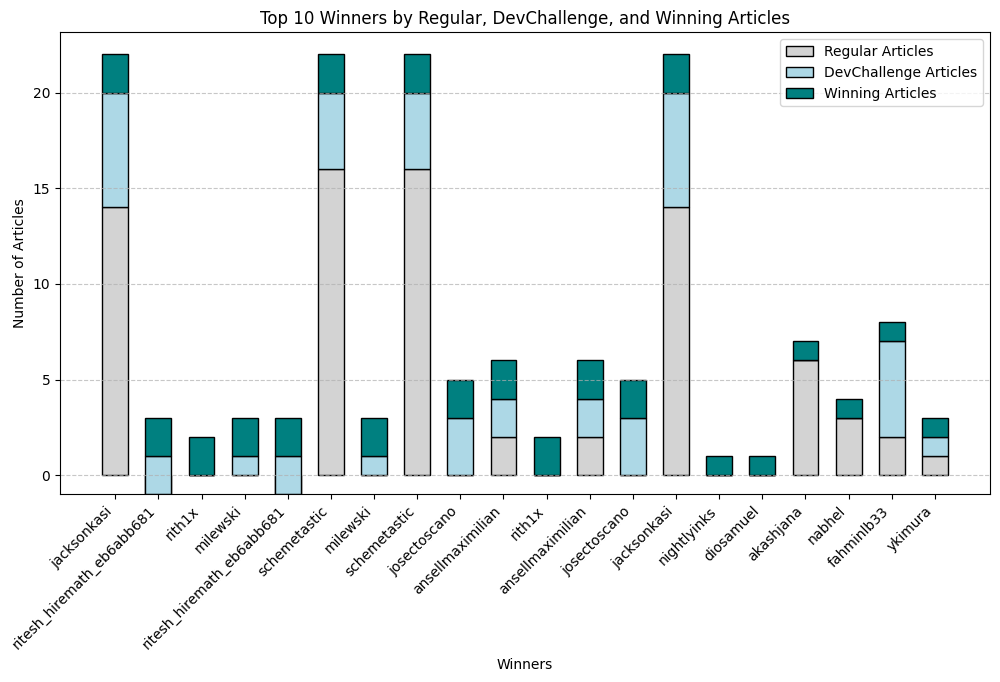

In [41]:
import matplotlib.pyplot as plt
import numpy as np

df_copy = extended_scrapped_winners_copy_df.copy()

df_copy['devchallenge_articles'] = df_copy['tags'].apply(lambda tag_lists: sum(1 for tags in tag_lists if 'devchallenge' in tags))
df_copy['winning_articles'] = df_copy['challenge_wins']
df_copy['devchallenge_articles'] = df_copy['devchallenge_articles'] - df_copy['winning_articles']
df_copy['regular_articles'] = df_copy['article_count'] - (df_copy['devchallenge_articles'] + df_copy['winning_articles'])

df_sorted = df_copy.sort_values(by='winning_articles', ascending=False).head(20)

indices = np.arange(len(df_sorted))
bar_width = 0.6

plt.figure(figsize=(12, 6))

plt.bar(indices, df_sorted['regular_articles'], width=bar_width, label='Regular Articles', 
        color='lightgray', edgecolor='black')
plt.bar(indices, df_sorted['devchallenge_articles'], width=bar_width, label='DevChallenge Articles', 
        color='lightblue', edgecolor='black', bottom=df_sorted['regular_articles'])
plt.bar(indices, df_sorted['winning_articles'], width=bar_width, label='Winning Articles', 
        color='teal', edgecolor='black', bottom=df_sorted['regular_articles'] + df_sorted['devchallenge_articles'])

plt.xlabel("Winners")
plt.ylabel("Number of Articles")
plt.title("Top 10 Winners by Regular, DevChallenge, and Winning Articles")
plt.xticks(indices, df_sorted['username'], rotation=45, ha="right")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


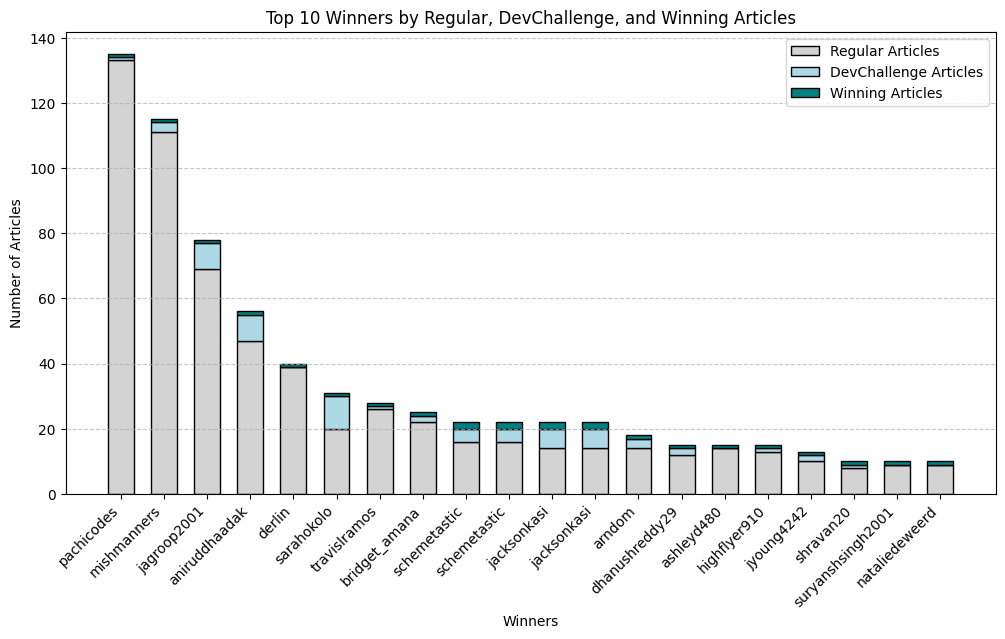

In [42]:
import matplotlib.pyplot as plt
import numpy as np

df_copy = extended_scrapped_winners_copy_df.copy()

df_copy['devchallenge_articles'] = df_copy['tags'].apply(lambda tag_lists: sum(1 for tags in tag_lists if 'devchallenge' in tags))
df_copy['winning_articles'] = df_copy['challenge_wins']
df_copy['devchallenge_articles'] = df_copy['devchallenge_articles'] - df_copy['winning_articles']
df_copy['regular_articles'] = df_copy['article_count'] - (df_copy['devchallenge_articles'] + df_copy['winning_articles'])

df_sorted = df_copy.sort_values(by='article_count', ascending=False).head(20)

indices = np.arange(len(df_sorted))
bar_width = 0.6

plt.figure(figsize=(12, 6))

plt.bar(indices, df_sorted['regular_articles'], width=bar_width, label='Regular Articles', 
        color='lightgray', edgecolor='black')
plt.bar(indices, df_sorted['devchallenge_articles'], width=bar_width, label='DevChallenge Articles', 
        color='lightblue', edgecolor='black', bottom=df_sorted['regular_articles'])
plt.bar(indices, df_sorted['winning_articles'], width=bar_width, label='Winning Articles', 
        color='teal', edgecolor='black', bottom=df_sorted['regular_articles'] + df_sorted['devchallenge_articles'])

plt.xlabel("Winners")
plt.ylabel("Number of Articles")
plt.title("Top 10 Winners by Regular, DevChallenge, and Winning Articles")
plt.xticks(indices, df_sorted['username'], rotation=45, ha="right")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


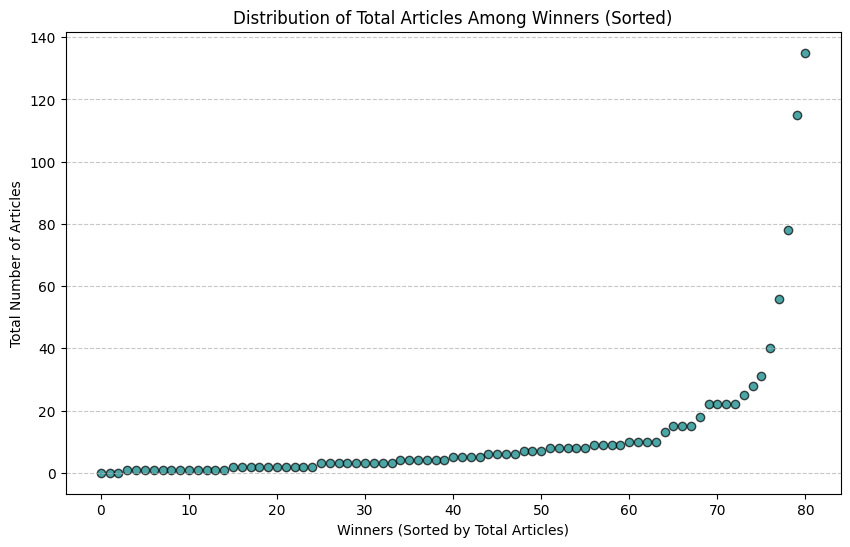

In [43]:
import matplotlib.pyplot as plt
import numpy as np

df_copy = extended_scrapped_winners_copy_df.copy()
df_sorted = df_copy.sort_values(by='article_count', ascending=True).reset_index()

plt.figure(figsize=(10, 6))

x = np.arange(len(df_sorted))
y = df_sorted['article_count']

plt.scatter(x, y, alpha=0.7, color='teal', edgecolors='black')

plt.xlabel("Winners (Sorted by Total Articles)")
plt.ylabel("Total Number of Articles")
plt.title("Distribution of Total Articles Among Winners (Sorted)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Interpretation:
Most winners have written very few articles – the majority of points are concentrated in the 1–10 article range.
A few users have an unusually high number of articles – on the right side, some points sharply stand out (50+, 100+, 150+ articles). These are extremely active authors.
Gradual increase followed by a sharp jump – at first, the number of articles grows slowly, but then there's an exponential rise. This is a typical pattern where a small percentage of users create the majority of the content.
Insights:
Most winners are not highly active authors (in terms of total articles).
Some winners are super-active bloggers on Dev.to.
Winning a challenge does not necessarily correlate with high content production – there are winners who have written only a handful of posts.

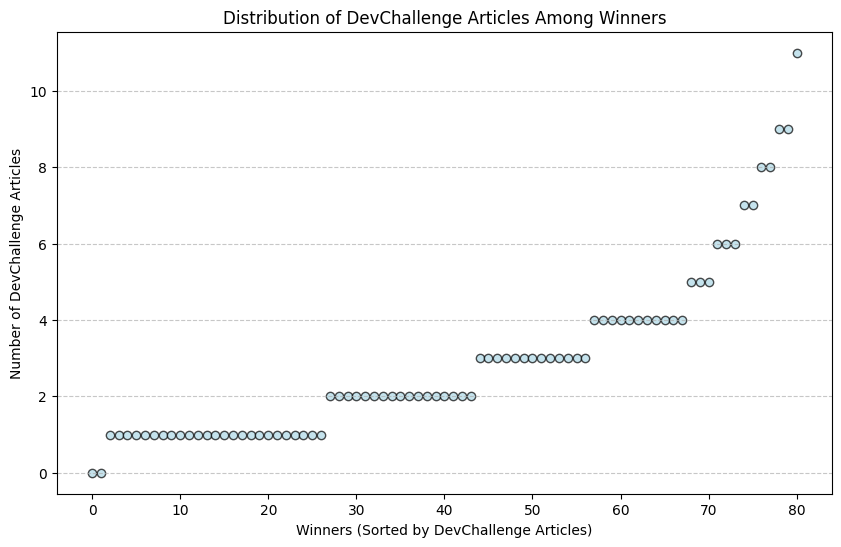

In [44]:
import matplotlib.pyplot as plt
import numpy as np

df_copy = extended_scrapped_winners_copy_df.copy()

df_copy['devchallenge_articles'] = df_copy['tags'].apply(lambda tag_lists: sum(1 for tags in tag_lists if 'devchallenge' in tags))

df_sorted = df_copy.sort_values(by='devchallenge_articles', ascending=True).reset_index()

plt.figure(figsize=(10, 6))

x = np.arange(len(df_sorted))
y = df_sorted['devchallenge_articles']

plt.scatter(x, y, alpha=0.7, color='lightblue', edgecolors='black')

plt.xlabel("Winners (Sorted by DevChallenge Articles)")
plt.ylabel("Number of DevChallenge Articles")
plt.title("Distribution of DevChallenge Articles Among Winners")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


It looks like most winners participated in only a few DevChallenge articles, with only a handful submitting more than 5–10 articles. The distribution is very skewed, meaning that:

Most winners only wrote 1–2 challenge articles, which suggests that occasional participation is more common.
A small group of winners contributed a lot more, likely indicating they are more active in Dev.to challenges.
The sharp jump at the right end suggests that only a few individuals consistently submit DevChallenge articles.


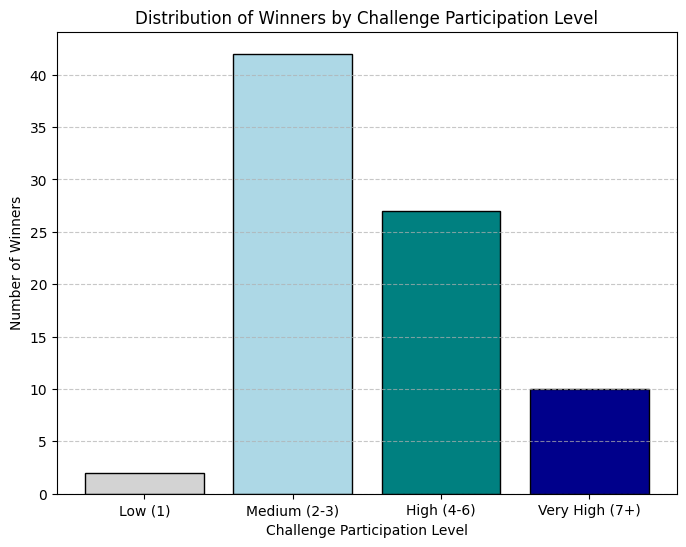

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_copy = extended_scrapped_winners_copy_df.copy()

df_copy['devchallenge_articles'] = df_copy['tags'].apply(lambda tag_lists: sum(1 for tags in tag_lists if 'devchallenge' in tags))

bins = [0, 1, 3, 6, np.inf]
labels = ['Low (1)', 'Medium (2-3)', 'High (4-6)', 'Very High (7+)']
df_copy['challenge_participation_level'] = pd.cut(df_copy['devchallenge_articles'], bins=bins, labels=labels, right=False)

participation_counts = df_copy['challenge_participation_level'].value_counts().reindex(labels)

plt.figure(figsize=(8, 6))
plt.bar(participation_counts.index, participation_counts.values, color=['lightgray', 'lightblue', 'teal', 'darkblue'], edgecolor='black')

plt.xlabel("Challenge Participation Level")
plt.ylabel("Number of Winners")
plt.title("Distribution of Winners by Challenge Participation Level")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



Most winners fall into the "Medium (2-3)" category – This means that the majority of winners have participated in a couple of challenges before winning.
A significant number of winners are in the "High (4-6)" category – These users are more actively engaged in Dev.to challenges.
Very few winners have only written one challenge article ("Low (1)") – This suggests that winning on the first attempt is rare.
Only a small group of winners are in the "Very High (7+)" category – These are likely the most dedicated Dev.to challenge participants, regularly submitting articles for different challenges.

Winning a challenge is more common for users who have participated multiple times (2-6 submissions).
There is no clear pattern that "more participation = more wins," but writing multiple challenge articles increases visibility and chances of winning.
Very few "one-time participants" win, meaning persistence may play a role in success.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_copy = extended_scrapped_winners_copy_df.copy()

df_copy['article_published_at'] = df_copy['article_published_at'].apply(lambda x: pd.to_datetime(x) if isinstance(x, list) else [])

df_copy['devchallenge_articles'] = df_copy['tags'].apply(lambda tag_lists: sum(1 for tags in tag_lists if 'devchallenge' in tags))

def calculate_avg_gap(row):
    dates = sorted(row['article_published_at'])
    if len(dates) > 1:
        gaps = np.diff(dates).astype('timedelta64[D]').astype(int)
        return np.mean(gaps)
    return None

df_copy['avg_days_between_articles'] = df_copy.apply(calculate_avg_gap, axis=1)

bins = [0, 7, 30, 90, 180, 365, np.inf]
labels = ["<1 week", "1 week - 1 month", "1-3 months", "3-6 months", "6-12 months", "1+ years"]
df_copy['publishing_frequency'] = pd.cut(df_copy['avg_days_between_articles'], bins=bins, labels=labels, right=False)

publishing_counts = df_copy['publishing_frequency'].value_counts().reindex(labels).fillna(0)

plt.figure(figsize=(10, 6))
plt.bar(publishing_counts.index, publishing_counts.values, color="teal", edgecolor="black")

plt.xlabel("Publishing Frequency")
plt.ylabel("Number of Winners")
plt.title("Distribution of Publishing Frequency Among Winners")
plt.xticks(rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:
filtered_winners_df = extended_scrapped_winners_df.copy()

def filter_articles(row):
    titles = row['article_titles']
    reading_times = row['article_reading_time_minutes']
    comments = row['article_comments_counts']
    reactions = row['article_positive_reactions_counts']
    
    # Apply the filter based on reading time > 1
    filtered_data = [
        (title, time, comment, reaction) 
        for title, time, comment, reaction in zip(titles, reading_times, comments, reactions) 
        if time > 1
    ]
    
    if filtered_data:
        titles, reading_times, comments, reactions = zip(*filtered_data)
    else:
        titles, reading_times, comments, reactions = [], [], [], []
    
    return pd.Series({
        'article_titles': list(titles),
        'article_reading_time_minutes': list(reading_times),
        'article_comments_counts': list(comments),
        'article_positive_reactions_counts': list(reactions)
    })


filtered_columns = filtered_winners_df.apply(filter_articles, axis=1)
filtered_winners_df[['article_titles', 'article_reading_time_minutes', 
                       'article_comments_counts', 'article_positive_reactions_counts']] = filtered_columns


filtered_winners_df['article_count'] = filtered_winners_df['article_titles'].apply(len)

# Define Categories
filtered_winners_df['category'] = 'Empty Profiles'  # Default category

# Active Contributors: Users with articles (with reading time > 1) or comments
filtered_winners_df.loc[(filtered_winners_df['article_count'] > 0) | 
                          (filtered_winners_df['comments_count'] > 0), 'category'] = 'Active Contributors'

# Connected Profiles: Users with external connections (website, GitHub, or Twitter)
filtered_winners_df.loc[(filtered_winners_df[['website_url', 'github_username', 'twitter_username']].notna().any(axis=1)) &
                          (filtered_winners_df['category'] == 'Empty Profiles'), 'category'] = 'Connected Profiles'

# Basic Profiles: Users with minimal signs (location or summary)
filtered_winners_df.loc[(filtered_winners_df[['location', 'summary']].notna().any(axis=1)) &
                          (filtered_winners_df['category'] == 'Empty Profiles'), 'category'] = 'Basic Profiles'

category_counts = filtered_winners_df['category'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


category_counts.plot(kind='barh', color="teal", edgecolor="gray", ax=ax1)
ax1.set_xlabel("Number of Followers")
ax1.set_ylabel("User Categories")
ax1.set_title("Distribution of Followers by Category")
ax1.invert_yaxis()
ax1.grid(axis='x', linestyle='--', alpha=0.7)


ax2.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'width': 0.3}, colors=["teal", "lightcoral", "skyblue", "orange"])
ax2.set_title("Distribution of Followers by Category (Donut Chart)")

plt.tight_layout()
plt.show()

NameError: name 'extended_scrapped_winners_df' is not defined

In [ ]:
# Check if the articles file exists
if os.path.exists("github_winners.parquet"):
    # Load github users from the existing Parquet file
    github_winners_df = pd.read_parquet("github_winners.parquet")
    print("Loaded  github users  from articles.parquet")
else:
    # Fetch github users and save to Parquet file
    github_winners_df = github_client.update_with_github(filtered_winners_df, filter_connected_profiles=False)
    github_winners_df.to_parquet("github_winners.parquet", compression='gzip')
    print("Fetched  github users  from API and saved to github_winners.parquet")

github_winners_df.head(10)


Loaded  github users  from articles.parquet


,challendge_name,username,name,twitter_username,github_username,summary,location,website_url,joined_at,profile_image,...,article_comments_counts,article_positive_reactions_counts,badges,badge_descriptions,comments_count,tags_count,category,github_created_at,github_updated_at,github_public_repos
0,Frontend Challenge v24.03.20,floscode,Florian,None,flos-code,Junior Frontend Developer • JavaScript & Angul...,Germany,https://scholz-florian.com/,"Mar 17, 2024","https://media2.dev.to/dynamic/image/width=320,...",...,"[8, 32]","[18, 135]","[Cloudflare AI Challenge Completion Badge, 4 W...",[Awarded for completing at least one prompt in...,25,11,Active Contributors,2023-10-19T12:29:09Z,2024-07-13T17:13:27Z,18.0
1,Frontend Challenge v24.03.21,rafajrg21,Rafael Romero,None,Rafajrg21,"Computer Engineer from Venezuela 💻\n\n""Try to ...","Maracaibo, Venezuela",,"Mar 3, 2018","https://media2.dev.to/dynamic/image/width=320,...",...,"[3, 0, 15, 0]","[4, 2, 37, 1]","[Frontend Challenge Completion Badge, CS Chall...",[Awarded for completing at least one prompt in...,21,26,Active Contributors,2018-02-19T05:02:47Z,2024-08-15T22:29:55Z,40.0
2,Frontend Challenge v24.03.22,highflyer910,Thea,highflyer910,highflyer910,"Frontend Engineer with a passion for Python, V...","Batumi, Georgia",https://www.teona.dev/,"Jan 29, 2017","https://media2.dev.to/dynamic/image/width=320,...",...,"[13, 7, 0, 0, 0, 0, 0, 5, 2, 4, 0, 2, 16, 9, 6]","[77, 24, 7, 5, 1, 9, 5, 19, 7, 25, 54, 40, 273...","[Eight Year Club, Frontend Challenge Completio...",[This badge celebrates the longevity of those ...,48,58,Active Contributors,2014-01-18T23:29:00Z,2024-11-23T22:06:17Z,110.0
3,Cloudflare AI Challenge,kaarthik108,Kaarthik Andavar,kaarthikcodes,kaarthik108,AI Engineering,NewZealand,https://www.k01.dev/,"Jun 16, 2023","https://media2.dev.to/dynamic/image/width=320,...",...,"[2, 3, 0, 1]","[11, 29, 1, 2]","[One Year Club, AWS Amplify Fullstack TypeScri...",[This badge celebrates the longevity of those ...,0,0,Active Contributors,2019-07-18T04:22:53Z,2025-02-05T19:51:04Z,44.0
4,Cloudflare AI Challenge,anselm94,Merbin J Anselm,MerbinJAnselm,anselm94,Connect with me on LinkedIn: https://linkedin....,Tirunelveli,https://github.com/anselm94,"Apr 18, 2019","https://media2.dev.to/dynamic/image/width=320,...",...,"[2, 10]","[3, 58]","[2 Week Community Wellness Streak, 1 Week Comm...",[Keep the community conversation going! Post a...,11,34,Active Contributors,2014-10-06T08:14:30Z,2025-01-28T12:32:13Z,20.0
5,Cloudflare AI Challenge,julianandreszb,julianandreszb,None,julianandreszb,None,None,None,"Feb 13, 2021","https://media2.dev.to/dynamic/image/width=320,...",...,[3],[17],"[Cloudflare AI Challenge Winner Badge, Writing...",[Awarded for submitting a winning project to t...,2,13,Active Contributors,2016-10-15T23:23:27Z,2025-01-31T20:37:07Z,3.0
6,Frontend Challenge v24.04.17,schmoris,Boris,None,boris-schwarz,,None,None,"Nov 14, 2023","https://media2.dev.to/dynamic/image/width=320,...",...,[29],[71],"[One Year Club, Beloved Comment, CSS, Frontend...",[This badge celebrates the longevity of those ...,53,7,Active Contributors,2015-07-13T08:51:29Z,2025-02-03T20:19:56Z,6.0
7,Frontend Challenge v24.04.17,devdongsu,dongsu,None,dev-dong-su,,,,"Jun 14, 2023","https://media2.dev.to/dynamic/image/width=320,...",...,[11],[29],"[One Year Club, 2 Week Community Wellness Stre...",[This badge celebrates the longevity of those ...,6,11,Active Contributors,2016-01-31T14:20:28Z,2024-12-29T05:40:19Z,26.0
8,Frontend Challenge v24.04.17,jorgedelcampo,Jorge del Campo,None,jorgedelcampo,Growth Marketing and Web Development Consultan...,"Santiago, Chile",https://www.instagram.com/blomg.cl/,"Apr 20, 2024","https://media2.dev.to/dynamic/image/width=320,...",...,"[0, 5]","[3, 36]","[2 Week Community Wellness Streak, 1 Week Comm...",[Keep the community conversation going! Post a...,12,0,Active Contributors,2017-05-20T21:44:40Z,2024-08-27T14:49:45Z,9.0
9,Coze AI Bot Challenge,phalkmin,Paulo Henrique,None,phalkmin,WordPr

In [ ]:
github_winners_df.columns

Index(['challendge_name', 'username', 'name', 'twitter_username',
       'github_username', 'summary', 'location', 'website_url', 'joined_at',
       'profile_image', 'article_count', 'article_titles', 'unique_tags',
       'article_reading_time_minutes', 'article_comments_counts',
       'article_positive_reactions_counts', 'badges', 'badge_descriptions',
       'comments_count', 'tags_count', 'category', 'github_created_at',
       'github_updated_at', 'github_public_repos'],
      dtype='object')

In [ ]:
github_winners_copy_df = github_winners_df.copy()
github_winners_copy_df['github_created_at'] = pd.to_datetime(github_winners_copy_df['github_created_at']).dt.date
github_winners_copy_df['github_updated_at'] = pd.to_datetime(github_winners_copy_df['github_updated_at']).dt.date

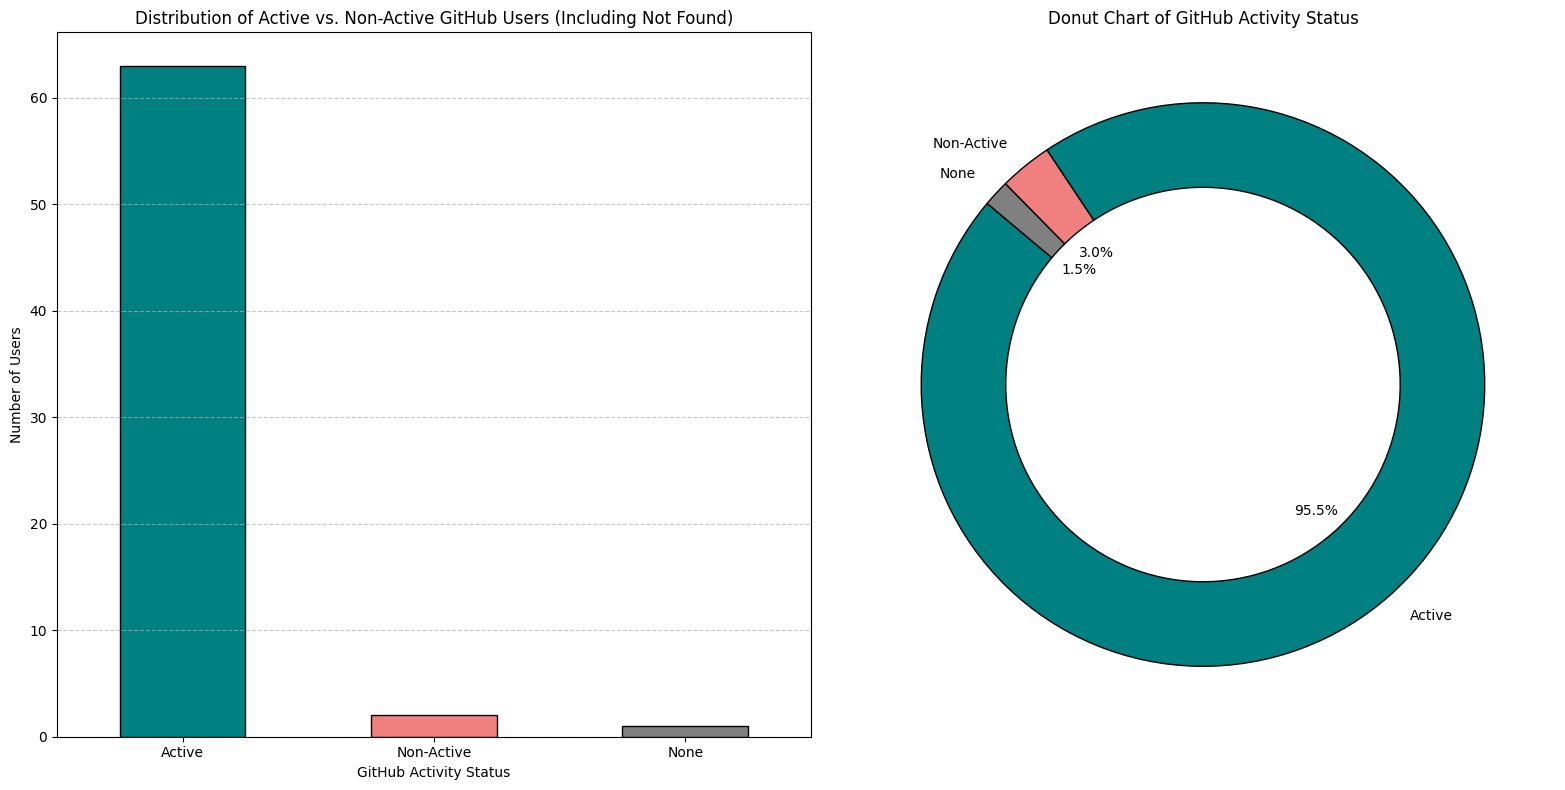

In [ ]:
github_winners_copy_df['github_activity_status'] = github_winners_copy_df.apply(
    lambda x: 'Active' if (pd.notna(x['github_public_repos']) and x['github_created_at'] != x['github_updated_at'] and x['github_public_repos'] > 2) 
              else 'Non-Active' if pd.notna(x['github_public_repos']) 
              else 'None',
    axis=1
)

activity_counts = github_winners_copy_df['github_activity_status'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

activity_counts.plot(kind='bar', color=["teal", "lightcoral", "gray"], edgecolor="black", ax=ax1)
ax1.set_xlabel("GitHub Activity Status")
ax1.set_ylabel("Number of Users")
ax1.set_title("Distribution of Active vs. Non-Active GitHub Users (Including Not Found)")
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticklabels(activity_counts.index, rotation=0)

ax2.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=["teal", "lightcoral", "gray"], wedgeprops={'width': 0.3, 'edgecolor': 'black'})
ax2.set_title("Donut Chart of GitHub Activity Status")

plt.tight_layout()
plt.show()


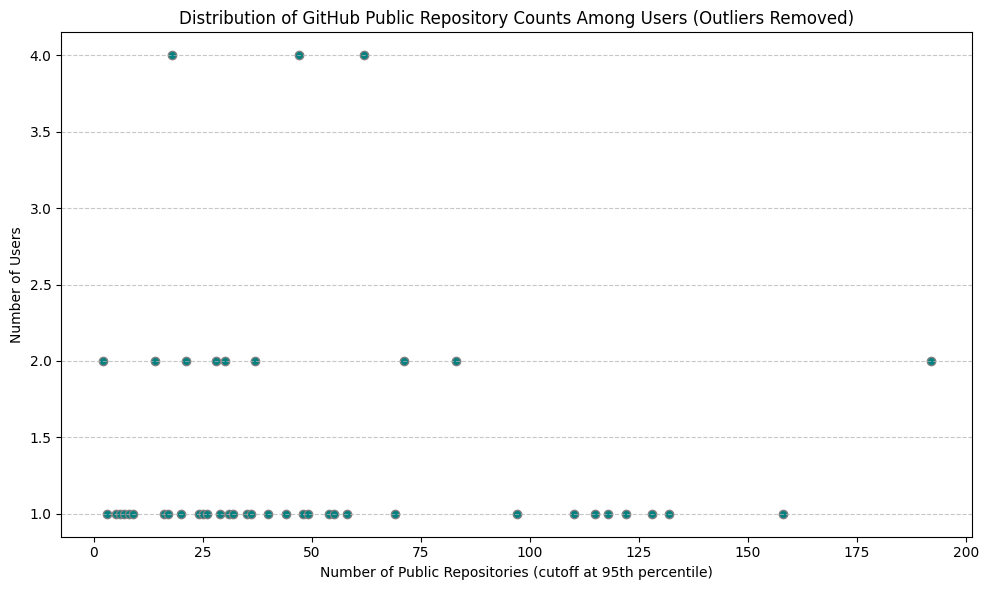

In [ ]:
github_winners_copy_df = github_winners_df.copy()
cleaned_repo_counts = github_winners_copy_df['github_public_repos'].dropna()
cutoff = np.percentile(cleaned_repo_counts, 98)

filtered_repo_counts = cleaned_repo_counts[cleaned_repo_counts <= cutoff].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(filtered_repo_counts.index, filtered_repo_counts.values, color="teal", edgecolor="gray", alpha=1)

plt.xlabel("Number of Public Repositories (cutoff at 95th percentile)")
plt.ylabel("Number of Users")
plt.title("Distribution of GitHub Public Repository Counts Among Users (Outliers Removed)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


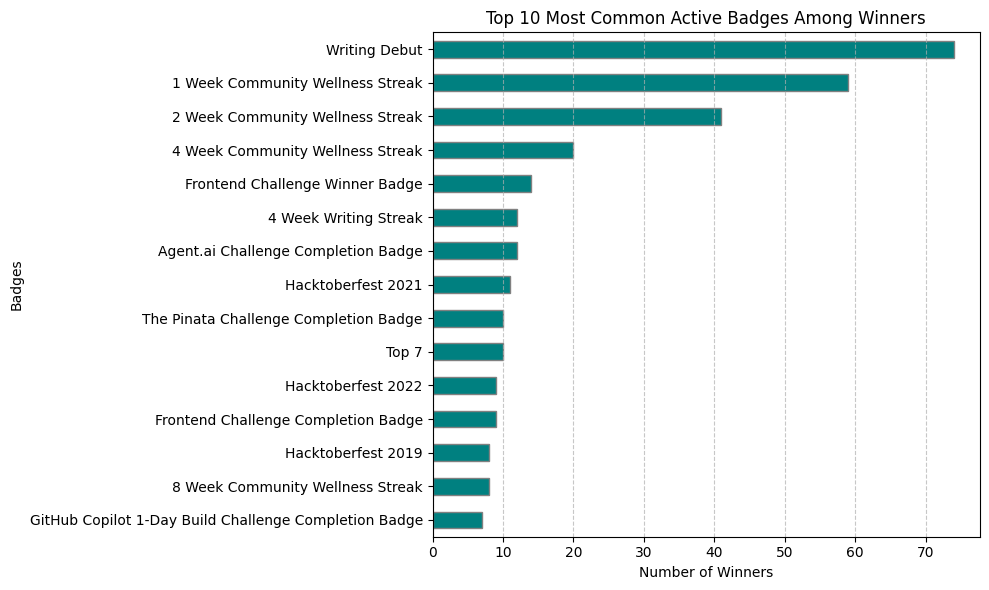

In [ ]:
winners_df_copy = filtered_winners_df.copy()
all_badge_counts = winners_df_copy['badges'].explode().value_counts()

# Remove badges that contain "Year Club"
filtered_badge_counts = all_badge_counts[~all_badge_counts.index.str.contains("Year Club")].head(15)

plt.figure(figsize=(10, 6))
filtered_badge_counts.plot(kind='barh', color='teal', edgecolor='gray')
plt.xlabel("Number of Winners")
plt.ylabel("Badges")
plt.title("Top 10 Most Common Active Badges Among Winners")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


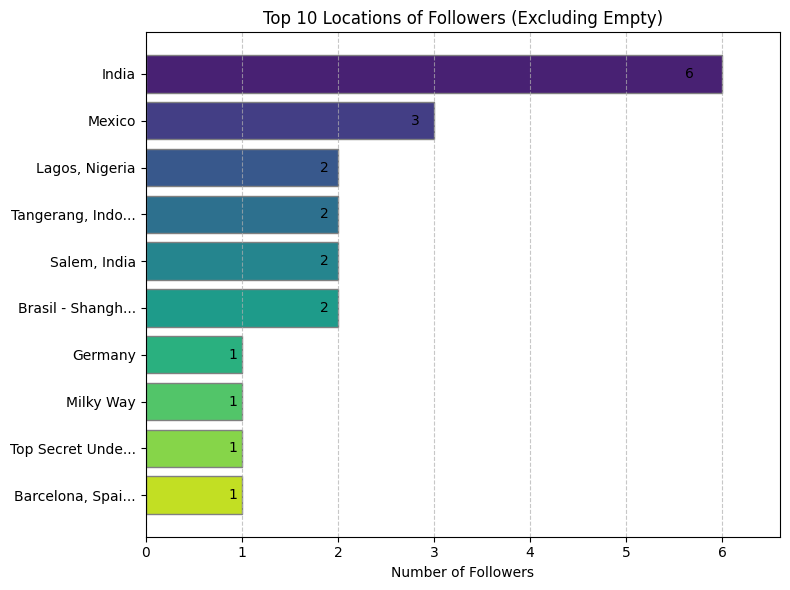

In [ ]:
# Filter out empty or NaN values in the 'location' column and calculate the top 10 locations
top_locations = filtered_winners_df['location'].dropna().replace('', pd.NA).dropna().value_counts().nlargest(10)

# Truncate location names to a maximum of 15 characters
def truncate_label(label, max_length=15):
    return label if len(label) <= max_length else label[:max_length] + "..."

labels = [truncate_label(loc) for loc in top_locations.index]
values = top_locations.values

palette = sns.color_palette("viridis", len(labels))

plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

plt.xlim(0, max(values) * 1.1)

for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05), 
             bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center', ha='right', fontsize=10, color='black')

plt.xlabel("Number of Followers")
plt.title("Top 10 Locations of Followers")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()





In [ ]:
winners_df_copy['unique_tags'][0]

['devchallenge',
 'webdev',
 'css',
 'javascript',
 'ai',
 'cloudflarechallenge',
 'frontendchallenge']

Winning Articles vs. Non-Winning Articles - Engagement Analysis

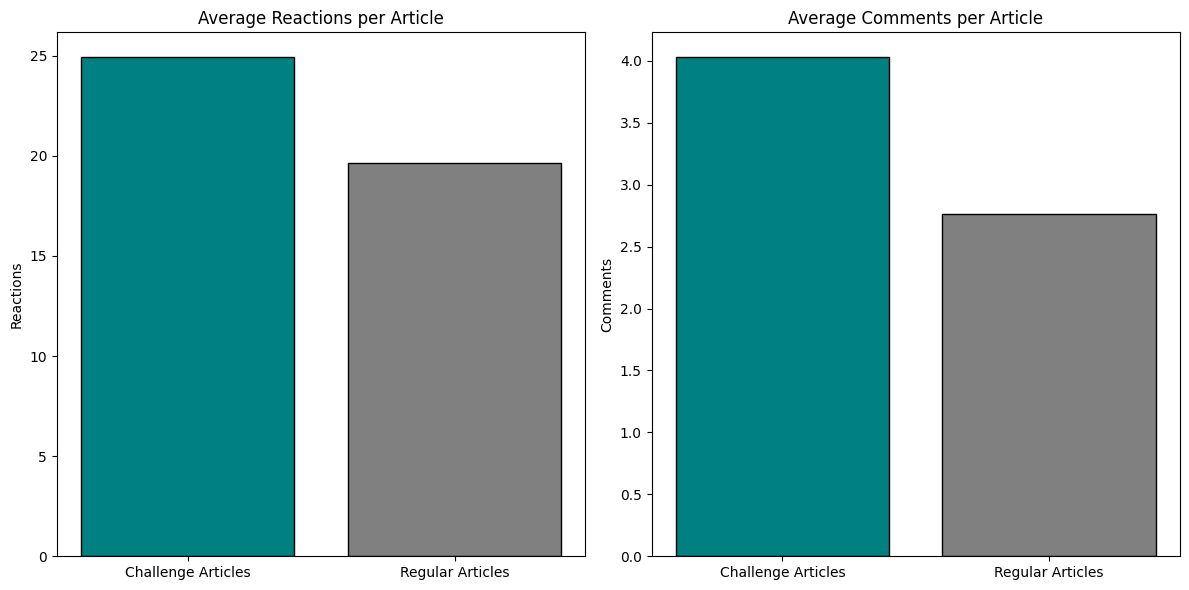

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df_copy = extended_scrapped_winners_copy_df.copy()

df_copy['devchallenge_articles'] = df_copy['tags'].apply(lambda tag_lists: sum(1 for tags in tag_lists if 'devchallenge' in tags))
df_copy['regular_articles'] = df_copy['article_count'] - df_copy['devchallenge_articles']

df_copy['total_reactions'] = df_copy['article_positive_reactions_counts'].apply(sum)
df_copy['total_comments'] = df_copy['article_comments_counts'].apply(sum)

df_copy['avg_reactions_per_article'] = df_copy['total_reactions'] / df_copy['article_count']
df_copy['avg_comments_per_article'] = df_copy['total_comments'] / df_copy['article_count']

challenge_articles_reactions = df_copy[df_copy['devchallenge_articles'] > 0]['avg_reactions_per_article'].mean()
regular_articles_reactions = df_copy[df_copy['regular_articles'] > 0]['avg_reactions_per_article'].mean()

challenge_articles_comments = df_copy[df_copy['devchallenge_articles'] > 0]['avg_comments_per_article'].mean()
regular_articles_comments = df_copy[df_copy['regular_articles'] > 0]['avg_comments_per_article'].mean()

labels = ['Challenge Articles', 'Regular Articles']
reactions_values = [challenge_articles_reactions, regular_articles_reactions]
comments_values = [challenge_articles_comments, regular_articles_comments]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(labels, reactions_values, color=['teal', 'gray'], edgecolor='black')
axes[0].set_title("Average Reactions per Article")
axes[0].set_ylabel("Reactions")

axes[1].bar(labels, comments_values, color=['teal', 'gray'], edgecolor='black')
axes[1].set_title("Average Comments per Article")
axes[1].set_ylabel("Comments")

plt.tight_layout()
plt.show()
